In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

## Loading and Preprocessing

In [3]:
# Load Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.duplicated().sum()

1

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

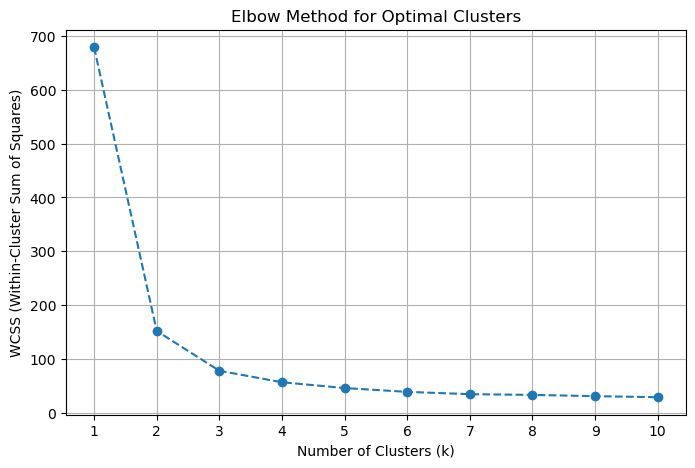

In [10]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for the model

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


## Clustering Algorithm Implementation
A) KMeans Clustering
Brief Description:
KMeans clustering is a centroid-based algorithm that partitions data into a predefined number of clusters (k). The algorithm works by:

Assigning each data point to the nearest cluster center (centroid).
Recalculating the centroids based on the mean of points in the cluster.
Repeating the assignment and centroid recalculation until the clusters stabilize.
Why KMeans is suitable for the Iris dataset:

The Iris dataset is numerical and has clear, well-separated clusters.
KMeans works well when clusters are spherical (circular or elliptical), which fits the structure of Iris data.

In [13]:
#Code for KMeans Clustering
from sklearn.cluster import KMeans

# Applying KMeans with 3 clusters (based on the number of species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Predicting the cluster labels
df['kmeans_labels'] = kmeans_labels

# Visualizing the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('KMeans Clustering of Iris Dataset')
plt.show()


NameError: name 'kmeans_labels' is not defined

## Hierarchical Clustering

Hierarchical clustering builds a hierarchy of clusters either through:

Agglomerative (bottom-up approach): Starts with each point as a single cluster and merges the closest clusters iteratively.
Divisive (top-down approach): Starts with all points in one cluster and splits them into subclusters.
For simplicity, we’ll use agglomerative clustering here.

Why Hierarchical Clustering is suitable for the Iris dataset:

It doesn’t require the number of clusters to be specified beforehand (though we will specify it for visualization).
It provides a dendrogram, a tree-like structure that helps visualize the merging of clusters, which can be useful to understand the data structure.

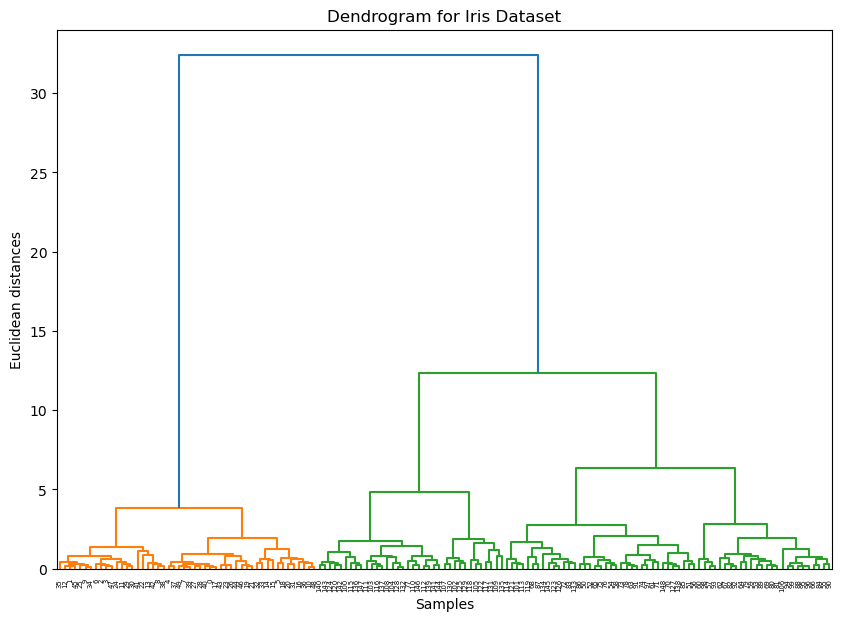

In [15]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Applying Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df)

# Visualizing the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

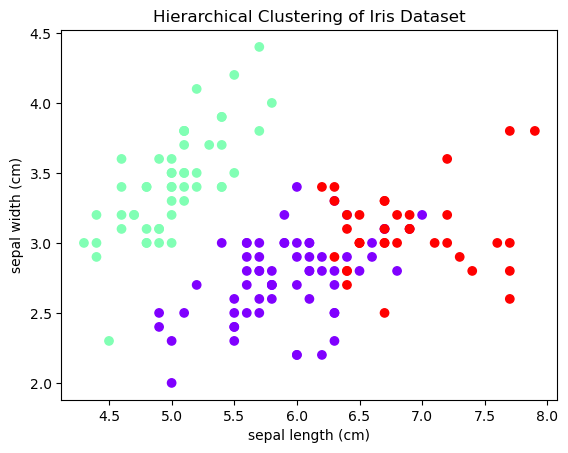

In [16]:
# Visualizing the clusters formed by Hierarchical Clustering
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=hierarchical_labels, cmap='rainbow')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Hierarchical Clustering of Iris Dataset')
plt.show()
